In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy,math

In [2]:
path = '/Users/hanhuaxing/Desktop/GongLab/Code/Studying/吴恩达机器学习课后练习/ex2data2.txt'
data = pd.read_csv(filepath_or_buffer=path,header=None,names=['Exam1Score','Exam2Score','Result'])

X = np.c_[data['Exam1Score'],data['Exam2Score']]
y = data['Result']

data.head()

,Exam1Score,Exam2Score,Result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Text(0, 0.5, 'Exam2')

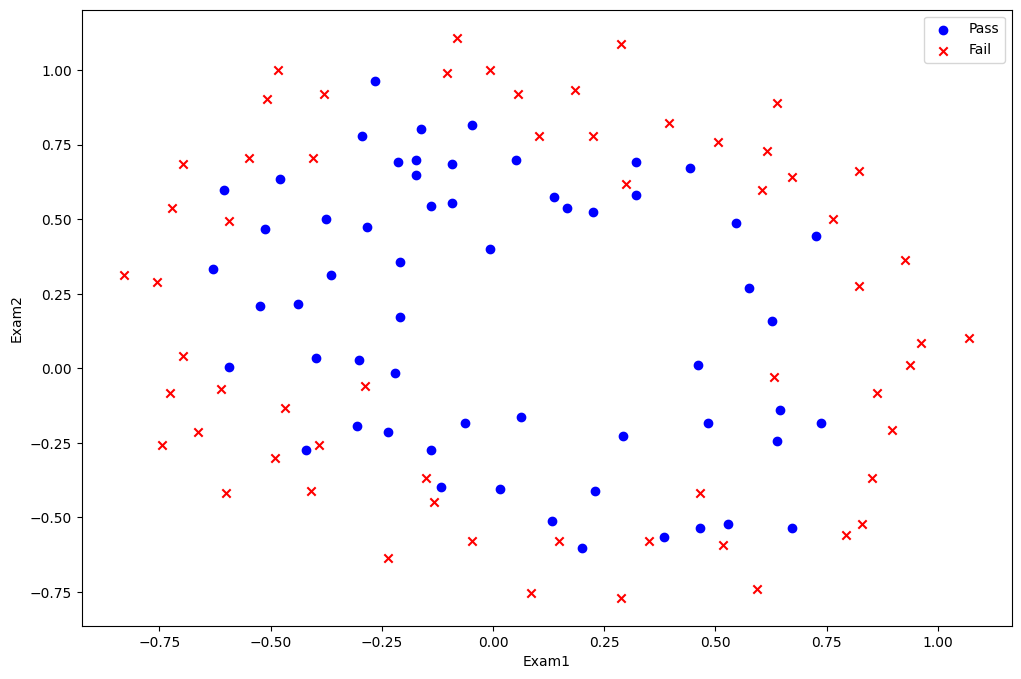

In [3]:
# 创建原始数据散点图--自己
exam1 = X[:,0].reshape(-1,)
exam2 = X[:,1].reshape(-1,)

m,n = X.shape
fig, ax = plt.subplots(figsize=(12,8))

for i in range(m):
    if y[i] == 1:
        Pass = ax.scatter(exam1[i],exam2[i],c='b',marker='o',label='Pass')
    else:
        Fail = ax.scatter(exam1[i],exam2[i],c='r',marker='x',label='Fail')
ax.legend(handles=[Pass, Fail])
ax.set_xlabel('Exam1')
ax.set_ylabel('Exam2')

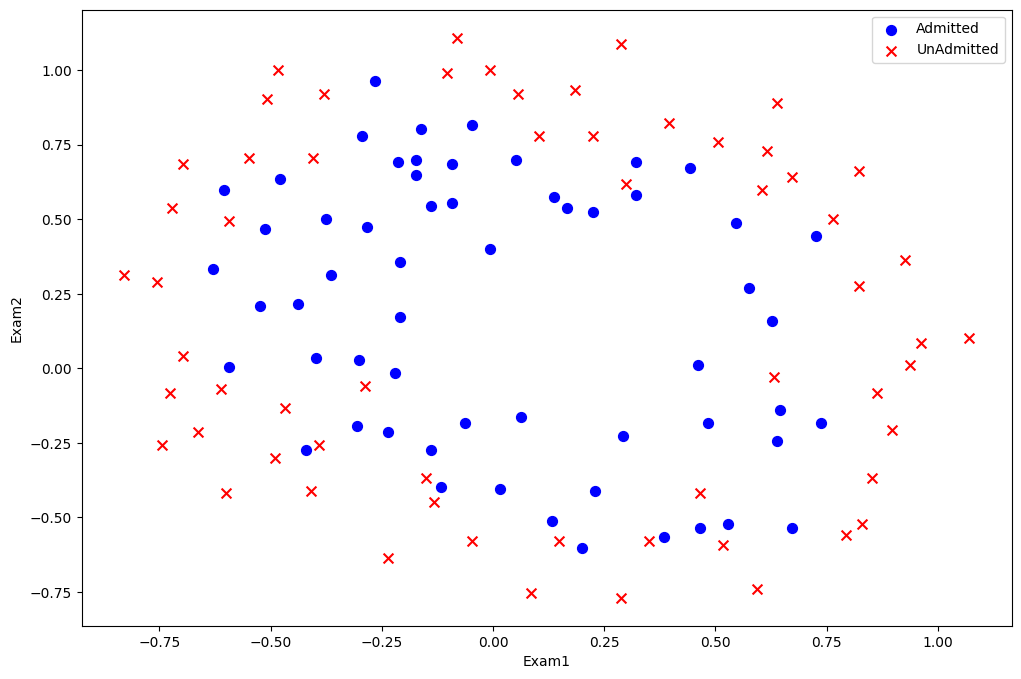

In [4]:
# 创建原始数据散点图--教材
Admitted = data[data['Result'].isin([1])]
UnAdmitted = data[data['Result'].isin([0])]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(Admitted['Exam1Score'],Admitted['Exam2Score'],s=50,c='b',marker='o',label='Admitted')
ax.scatter(UnAdmitted['Exam1Score'],UnAdmitted['Exam2Score'],s=50,c='r',marker='x',label='UnAdmitted')
ax.set_xlabel('Exam1')
ax.set_ylabel('Exam2')
ax.legend()

In [5]:
# 定义sigmoid函数
def sigmoid(z):
    g = 1 / (1+np.exp(-z))
    return g

In [6]:
# 定义cost function
def compute_cost_logistic(X,y,w,b,lambda_=1):
    m,n = X.shape
    cost = 0.
    cost_reg = 0.

    for i in range(m):
        z_i = np.dot(X[i],w)+b
        f_wb_i = sigmoid(z_i)
        cost = cost + y[i]*np.log(f_wb_i)+(1-y[i])*np.log(1-f_wb_i)
    cost = cost / ((-1)*m)

    for j in range(n):
        cost_reg = cost_reg + w[j]**2
    cost_reg = cost_reg * lambda_/(2*m)

    total_cost = cost + cost_reg
    return total_cost

In [7]:
# 定义gradient function
def compute_gradient_logistic(X,y,w,b,lambda_=1):
    m,n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0.

    for i in range(m):
        z_i = np.dot(X[i],w)+b
        err = sigmoid(z_i) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j]+err * X[i,j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    for j in range(n):
        dj_dw = dj_dw + w[j]*lambda_/m
    
    return dj_dw,dj_db

In [8]:
# 定义gradient descent function
def compute_gradient_descent(X,y,w_in,b_in,alpha,iters,cost,gradient,lambda_=1):
    J_his = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(iters):
        dj_dw,dj_db = gradient(X,y,w,b,lambda_)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J_his.append(cost(X,y,w,b,lambda_))

        if i% math.ceil(iters/10) == 0:
            print(f"Iteration {i}: Cost {J_his[-1]}")
    return w,b,J_his

In [9]:
# 缩放数据函数
def zscore_normalize_features(x):
    miu = np.mean(x,axis=0)
    sigma = np.std(x,axis=0)
    x_norm = (x-miu)/sigma
    return miu,sigma,x_norm

In [10]:
# 特征映射
# X = np.c_[exam1,exam1**2,exam1*exam2,exam2,exam2*2]
# miu,sigma,X_norm = zscore_normalize_features(X)

degree = 6
score1 = data['Exam1Score']
score2 = data['Exam2Score']

for i in range(1,degree+1):
    for j in range(0,i+1):
        data['F'+str(j)+str(i-j)] = np.power(score1,j) * np.power(score2,(i-j))

data.drop('Exam1Score',axis = 1,inplace=True)
data.drop('Exam2Score',axis = 1,inplace=True)

X2 = data.iloc[:,1:]
X2 = np.array(X2.values)
y2 = data['Result']
data.head()

,Result,F01,F10,F02,F11,F20,F03,F12,F21,F30,...,F32,F41,F50,F06,F15,F24,F33,F42,F51,F60
0,1,0.69956,0.051267,0.489384,0.035864,0.002628,0.342354,0.025089,0.001839,0.000135,...,0.000066,0.000005,3.541519e-07,0.117206,0.008589,0.000629,0.000046,0.000003,2.477505e-07,1.815630e-08
1,1,0.68494,-0.092742,0.469143,-0.063523,0.008601,0.321335,-0.043509,0.005891,-0.000798,...,-0.000374,0.000051,-6.860919e-06,0.103256,-0.013981,0.001893,-0.000256,0.000035,-4.699318e-06,6.362953e-07
2,1,0.69225,-0.213710,0.479210,-0.147941,0.045672,0.331733,-0.102412,0.031616,-0.009761,...,-0.004677,0.001444,-4.457837e-04,0.110047,-0.033973,0.010488,-0.003238,0.001000,-3.085938e-04,9.526844e-05
3,1,0.50219,-0.375000,0.252195,-0.188321,0.140625,0.126650,-0.094573,0.070620,-0.052734,...,-0.013299,0.009931,-7.415771e-03,0.016040,-0.011978,0.008944,-0.006679,0.004987,-3.724126e-03,2.780914e-03
4,1,0.46564,-0.513250,0.216821,-0.238990,0.263426,0.100960,-0.111283,0.122661,-0.135203,...,-0.029315,0.032312,-3.561597e-02,0.010193,-0.011235,0.012384,-0.013650,0.015046,-1.658422e-02,1.827990e-02


In [33]:
#LogisticClassification机器学习
m2,n2 = X2.shape
w_int = np.zeros(n2)
b_int = 0.
alpha =9.0e-3
iteration = 10000
lambda_ = 0.8

final_w, final_b, J_history = compute_gradient_descent(X2,y2,w_int,b_int,alpha,iteration,compute_cost_logistic,compute_gradient_logistic,lambda_)
print(final_w,final_b)

Iteration 0: Cost 0.6930320504226039
Iteration 1000: Cost 0.6410890934199139
Iteration 2000: Cost 0.6166072992782244
Iteration 3000: Cost 0.5999297275503762
Iteration 4000: Cost 0.5878003195838364
Iteration 5000: Cost 0.578740552599256
Iteration 6000: Cost 0.5718937563059766
Iteration 7000: Cost 0.5667149710811742
Iteration 8000: Cost 0.5628395763776505
Iteration 9000: Cost 0.5600145007389623
[ 0.96983914  0.28499499 -1.0018105  -0.75138276 -1.8170572  -0.1237321
  0.05396282  0.07335141  0.2439383  -0.98758678  0.23141431 -0.01168184
  0.41827608 -1.21296005 -0.3884887   0.3086524   0.36079311  0.5647672
  0.39261488  0.05882869 -0.81029208  0.49247237  0.35684521  0.68296435
  0.4006012   0.64208883 -0.7085254 ] 0.9254977733023829


Text(0, 0.5, 'Cost')

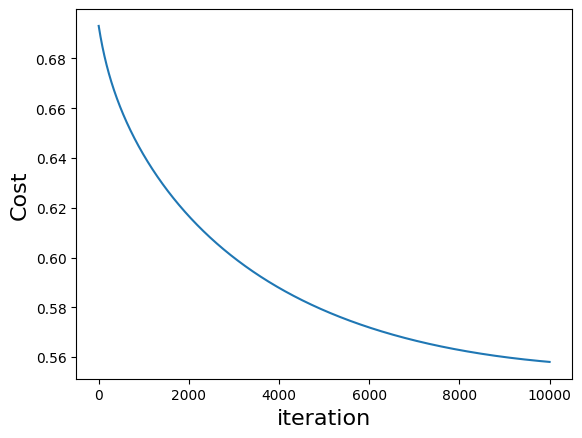

In [34]:
# 可视化
# Cost VS Iters
plt.plot(J_history)

plt.xlabel('iteration',fontsize=16)  # 添加横坐标轴标签
plt.ylabel('Cost',fontsize=16)  # 添加纵坐标轴标签

In [35]:
def z_final(x1,x2):
    degree = 6
    val = pd.DataFrame(index=range(10000))
    tmp = 0.
    x1 = x1.reshape(-1,)
    x2 = x2.reshape(-1,)

    for i in range(1,degree+1):
        for j in range(0,i+1):
             val['F'+str(j)+str(i-j)] = np.power(x1,j) * np.power(x2,(i-j))

    for i in range(n2):
        c = val.iloc[:,i]
        c = np.array(c.values) 
        c = c.reshape(-1,)     
        tmp = tmp + np.dot(c,final_w[i])
    tmp = tmp + final_b
    return tmp

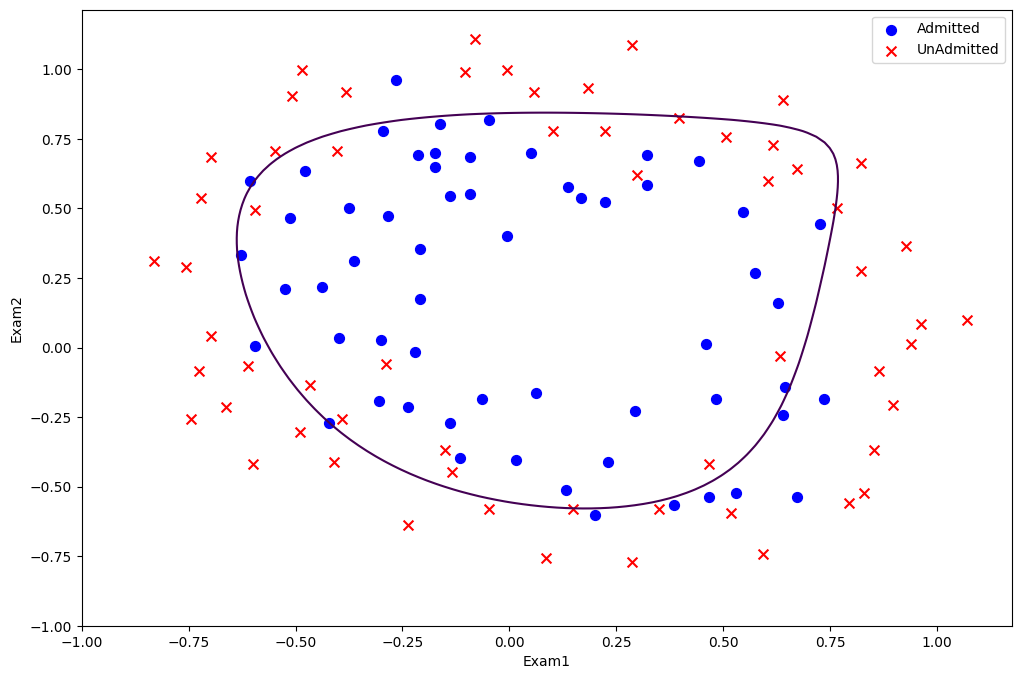

In [36]:
# 创建原始数据散点图--教材
path = '/Users/hanhuaxing/Desktop/GongLab/Code/Studying/吴恩达机器学习课后练习/ex2data2.txt'
data2 = pd.read_csv(filepath_or_buffer=path,header=None,names=['Exam1Score','Exam2Score','Result'])
Admitted = data2[data2['Result'].isin([1])]
UnAdmitted = data2[data2['Result'].isin([0])]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(Admitted['Exam1Score'],Admitted['Exam2Score'],s=50,c='b',marker='o',label='Admitted')
ax.scatter(UnAdmitted['Exam1Score'],UnAdmitted['Exam2Score'],s=50,c='r',marker='x',label='UnAdmitted')
ax.set_xlabel('Exam1')
ax.set_ylabel('Exam2')
ax.legend()

a = np.linspace(-1,1,100)
b = np.linspace(-1,1,100)
A,B = np.meshgrid(a,b)
Z = z_final(A,B)
Z = Z.reshape(100,100)

ax.contour(A,B,Z,levels=[0])
ax.grid(False)
plt.show()